## Run trained model on Test data to generate predictions

### First, select lesion type

In [1]:
lesion_types = ['MA','HE','EX','SE','OD']
selected_type = 'EX' # Default

In [2]:
#Imports
from matplotlib import pyplot as plt
%matplotlib inline
import keras, numpy as np, seaborn as sns, random, copy
from unet.unet import Unet

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Load model and weights
cnn = keras.models.load_model('models/' + selected_type + '_unet.hdf5')

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/topology.py:1269: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [4]:
#Load data
test_data = np.load('images/data/test_data.npy')
test_label = np.load('images/data/test_label_' + selected_type + '.npy')
print('Test dataset size: %d' % len(test_data))

Test dataset size: 6


In [5]:
#Predict
test_predictions = cnn.predict(test_data, batch_size=1, verbose=1)
#Save predictions
np.save('results/predictions', test_predictions)

6/6 [==============================] - 35s 6s/step


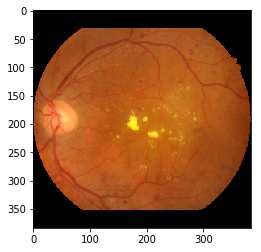

In [6]:
#Mask function
def maskImage(img, mask):
    return np.multiply(img, mask)

#Threshold function
def threshold(_mask, thr):
    mask = np.copy(_mask)
    mask[mask >= thr] = 1
    mask[mask < thr] = 0
    return mask

#See image
random_index = random.randint(0,len(test_data) - 1)
random_prediction = test_predictions[random_index]
original_image = test_data[random_index]
original_label = test_label[random_index]
plt.imshow(original_image)

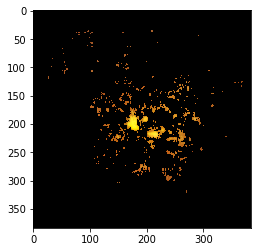

In [7]:
#See original label
plt.imshow(maskImage(original_image, original_label))

6.1520915e-08


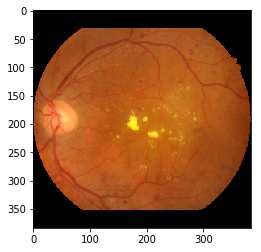

In [23]:
#See prediction
print(np.mean(random_prediction))
thr = 1e-47
plt.imshow(maskImage(original_image, threshold(random_prediction, thr)))

In [9]:
#Compare predictions with test_labels
# model.evaluate